In [345]:
import sys
print("Python: {}". format(sys.version))

Python: 3.6.4 |Anaconda, Inc.| (default, Mar 13 2018, 01:15:57) 
[GCC 7.2.0]


In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [397]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [347]:
#import of data in csv file from github
#comma separated

In [348]:
url = "https://raw.githubusercontent.com/QuarKUS7/EY/master/train.csv"
data = pd.read_csv(url)

In [349]:
data.shape

(891, 12)

In [350]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [351]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [395]:
print(data.columns.values)

['Sex' 'Survived' 'Age' 'SibSp' 'Parch' 'Fare' 'FamilySize' 'Single'
 'Small' 'Med' 'Large' 'Class_1' 'Class_2' 'Class_3' 'Deck_0' 'Deck_1'
 'Deck_2' 'Deck_3' 'Deck_4' 'Deck_5' 'Deck_6' 'Deck_7' 'Deck_8'
 'Embarked_0' 'Embarked_1' 'Embarked_2']


### Meet and Greet data.
1. **Sex** is the dependent variable. It is a nominal binary variable of two values: Male and Female.
2. **PassengerID** is a numerial variable. It seems to be random and unique for every passanger.
3. **Survived** is a nominal binary variable of values: 0 for not survived and 1 for survived.
4. **Pclass** is an ordinal variable of values: 1 for upper class, 2 for middle class and 3 for lower class. It approximates economic and social status of given passanger.
5. **Name** is disregarded.
6. **Age** is a quantitative and continous variable.
7. **SibSp** is a quantitative variable representing number of siblings or spouses on board.
8. **Parch** is a quantitative variable representing number of related parents/childern on board.
9. **Ticket** is a variable that similarly to PassengerID, seems to be random and unique for all passangers.
10. **Fare** is a quantitative variable that represents how much each passenger paid for the ticket.
11. **Cabin** is a varibale representing cabin number of each passenger.
12. **Embarked** is a categorical variable that represents the port of embarkation.

In [353]:
data = data.drop(['PassengerId','Name'], axis=1)

In [354]:
data = data[['Sex','Survived', 'Pclass','Age', 'SibSp', 'Parch',
 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [355]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Sex         891 non-null object
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Sex           0
Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are some 177 missing values in Age, 682 in Cabin and 2 in Embarked. Unfortunately, Cabin is missing 77% of it values so it will be difficult to use it meaningfuly. Fortunately, there are no missing values for Sex. 
We have to keep in mind this in train/test spliting so we stratifie missing values into both sets.

In [356]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is quite a range of fares in Fare variable. There are no extreme outliers in other variables.

Feature analysis

Sex - depedant variable

In [357]:
print("Men on board: {} ({:.2f} percent)".format(len(data[data['Sex'] == 'male']), len(data[data['Sex'] == 'male'])/len(data)*100))
print("Women on board: {} ({:.2f} percent)".format(len(data[data['Sex'] == 'female']), len(data[data['Sex'] == 'female'])/len(data)*100))

Men on board: 577 (64.76 percent)
Women on board: 314 (35.24 percent)


There are 577 men on board which means that if our clasifier predicts that everyone is men than we would get 64.76 % accurency. This might serve as our baseline model.

In [358]:
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Fare

/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


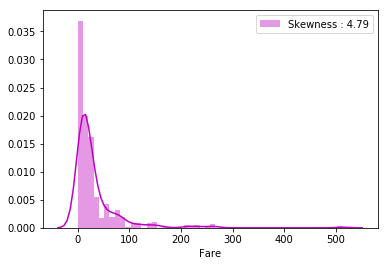

In [359]:
sns.distplot(data["Fare"], color="m", label="Skewness : %.2f"%(data["Fare"].skew())).legend(loc="best")


It is obvious fom the plot that Fare is very skewed. This can lead to overweigthin of outlaier values which is unplasent behaviour. It is a good practice to scale or transoform skewed data. I use log function to reduce skeweness.

In [360]:
data['Fare'] = data['Fare'].transform(lambda x: np.log(x) if x > 0 else 0)

/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


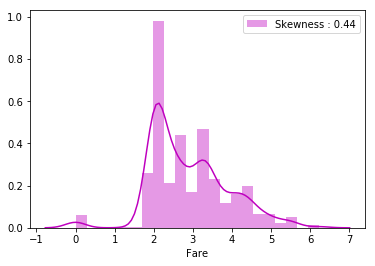

In [361]:
sns.distplot(data["Fare"], color="m", label="Skewness : %.2f"%(data["Fare"].skew())).legend(loc="best")

After the transofrmation, the skewness has been cleary reduced.

/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


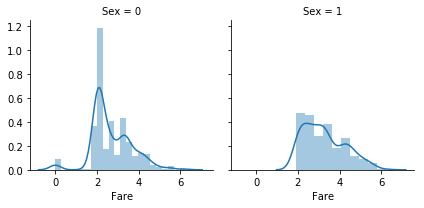

In [362]:
sns.FacetGrid(data, col='Sex').map(sns.distplot, "Fare")

Distribution of Fate is not identical for subpopulation of Sex. It seems that men had paied less for the ticket than women with high peak in cheap Fare.

On the other side, women distribution is more flat with more passenger with high Fare.

It seems that women paid paid more so for instance that they can travel in more confortable way. Moreover it seems that there were many men in low Fare categrory, traveling as for instance as imigrants to the U.S.

Age

/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


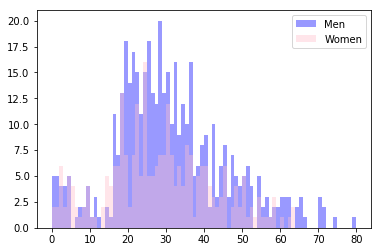

In [363]:
plt.subplot(111)
sns.distplot(data[data['Sex'] == 0]['Age'].dropna().values, bins = range(0, 81, 1), kde=False,color="blue", label = 'Men').legend(loc="best")
sns.distplot(data[data['Sex'] == 1]['Age'].dropna().values, bins = range(0, 81, 1), kde=False,color="pink", label = 'Women').legend(loc="best")

/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


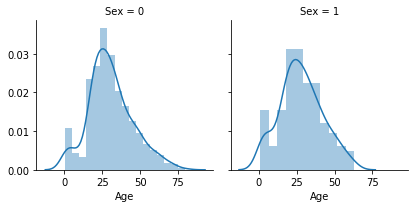

In [364]:
sns.FacetGrid(data, col='Sex').map(sns.distplot, "Age")

Distributions of the two subpopulation seems to be close to a gaussian distribution with tails.

There seems to be more  young men of age less than 30 and more than 65 than women, but there seems to be less men in 30 to 65 than women.

It is howvere import to keep in mind that there are 30% missing data. Many women maybe has refused to prove they age.`

Parch

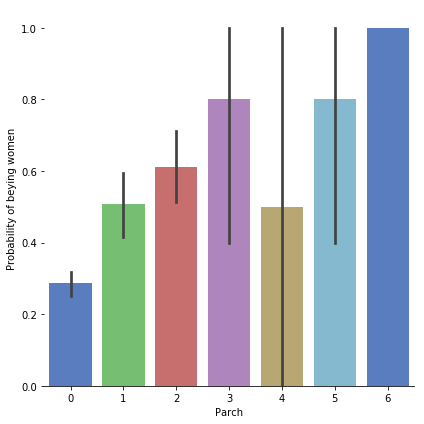

In [365]:
sns.factorplot(x="Parch",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

Passenger with not many children or parents on board (0-2) seems to be more men and with growing Parch it is growing also probability of passanger being women. Aldought they is significant standrad deviatio for Parh 3 to 5.

SibSp

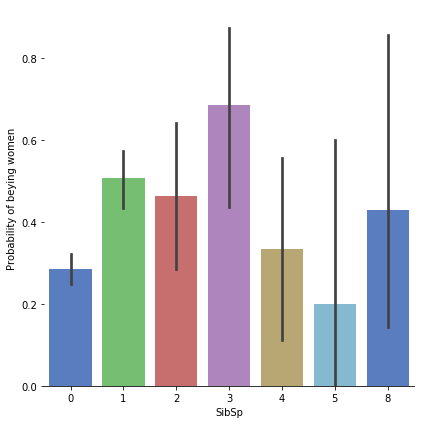

In [366]:
sns.factorplot(x="SibSp",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

It seems that passanger single seems to likely men also traveling with many siblings/spouses.

Survived

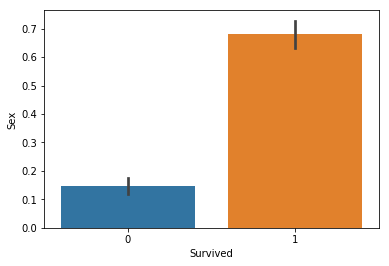

In [367]:
sns.barplot(x="Survived",y="Sex",data=data)

It is obvious that if the person has survived it was most probably women. This seems to be strong indicator for determing Sex.

Pclass

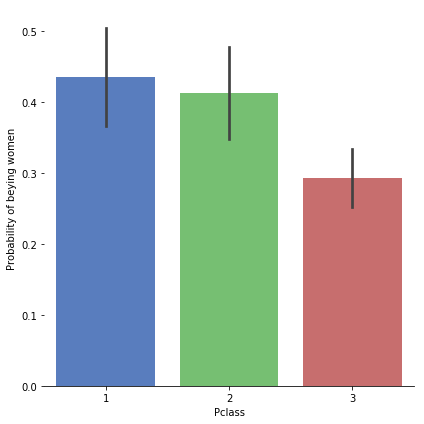

In [368]:
sns.factorplot(x="Pclass",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

It seems that decreasing Class the probability of beying women is decreasing. This is consistent with the analysis of Fare. Women were likley to travel in better Class.

Embarked

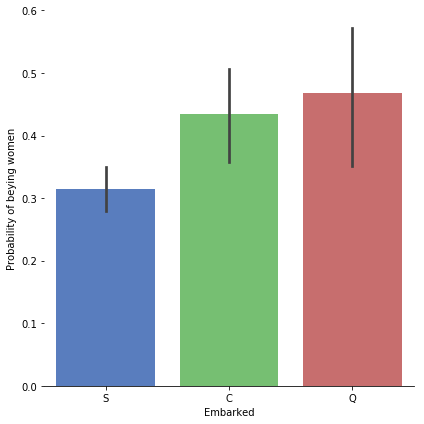

In [369]:
sns.factorplot(x="Embarked",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

It seems that probablity of passagner being women is the latter the passanger has embraked.

Sex         1.000000
Survived    0.543351
Pclass     -0.131900
Age        -0.093254
SibSp       0.114631
Parch       0.245489
Fare        0.264751
Name: Sex, dtype: float64

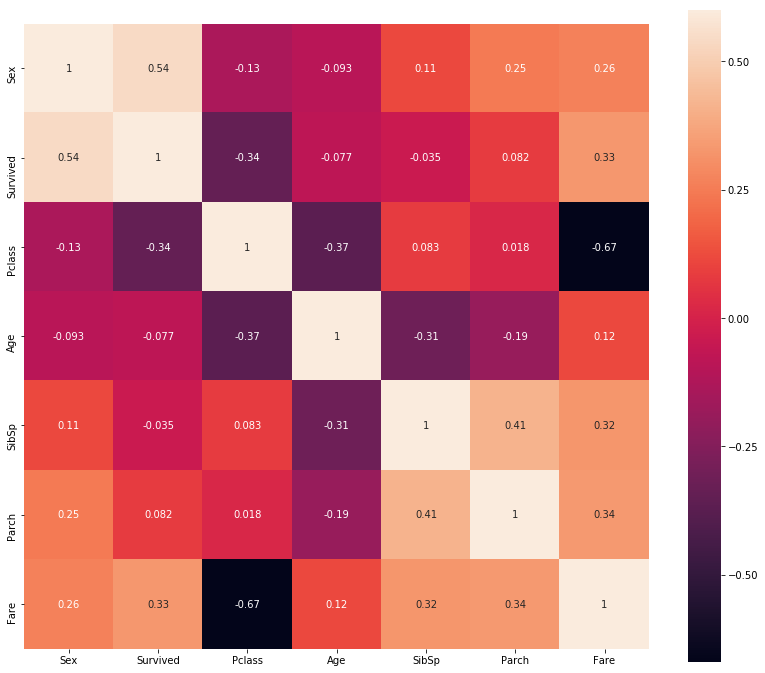

In [370]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)
data.corr()["Sex"]

It is obvious that Survive is strongly correlated with Sex and also Parch is somewhat correlated with Sex. This is consistent with hypothesis that children and women first. There is also noticeble negative correlation between PClass and Fare.

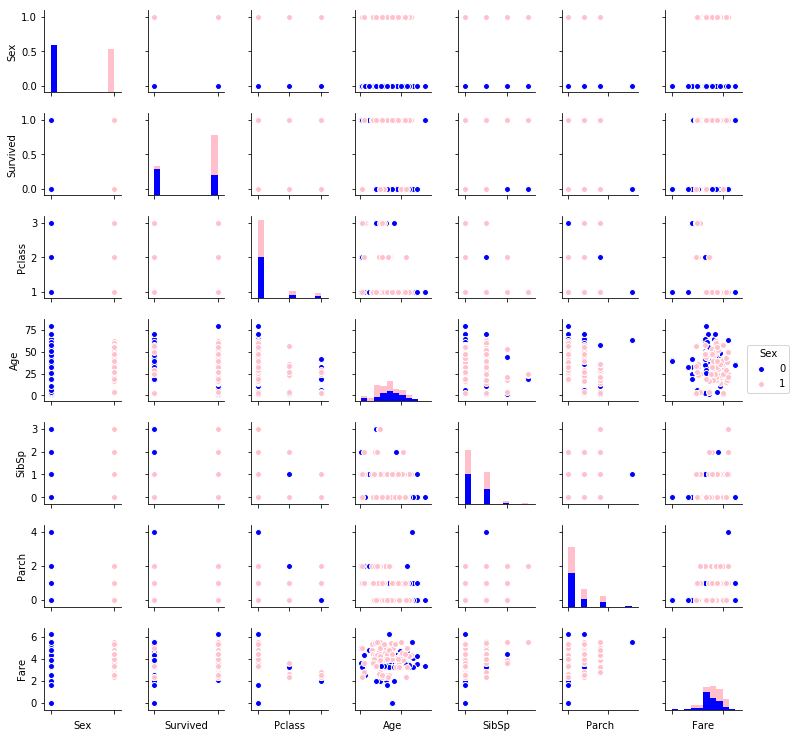

In [371]:
cols = ['Sex','Survived','Pclass','Age','SibSp','Parch','Fare']
g = sns.pairplot(data=data.dropna(), vars=cols, size=1.5,
                 hue='Sex', palette=['blue','pink'])
g.set(xticklabels=[])

## Feature engineering

Family size

In [372]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
print(data["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


It seems that there were traveling many people alone.

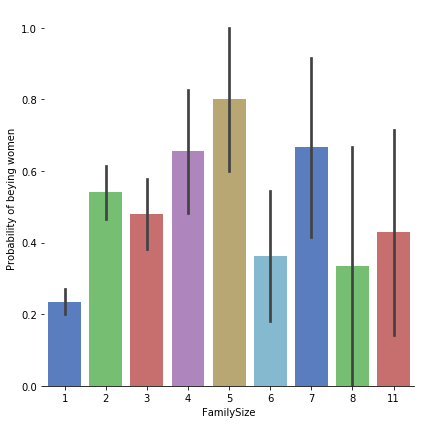

In [373]:
sns.factorplot(x="FamilySize",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

It seems that this new variable might have some predictive power given that small family size seems to be more common for men than women.

In [374]:
data['Single'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
data['Small'] = data['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
data['Med'] = data['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
data['Large'] = data['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

It would also be worth try to bin the family size according to number of family members.

In [375]:
data.head()

,Sex,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Med,Large
0,0,0,3,22.0,1,0,A/5 21171,1.981001,NaN,S,2,0,1,0,0
1,1,1,1,38.0,1,0,PC 17599,4.266662,C85,C,2,0,1,0,0
2,1,1,3,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1,0,0,0
3,1,1,1,35.0,1,0,113803,3.972177,C123,S,2,0,1,0,0
4,0,0,3,35.0,0,0,373450,2.085672,NaN,S,1,1,0,0,0


Deck

In [376]:
data["Deck"]=data['Cabin'].str[0]
data["Deck"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

The first letter of the Cabin indicates the Deck. It is possible to use this additional information and create new variable. Evendough there are many missing values for this variable.

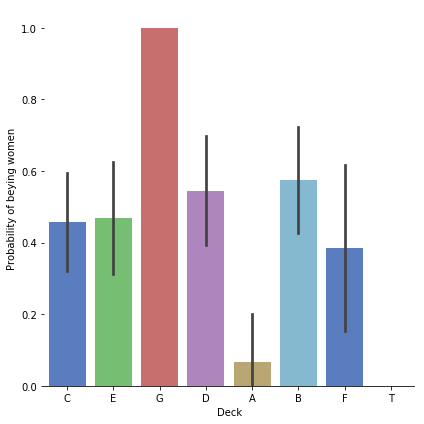

In [377]:
sns.factorplot(x="Deck",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

Completing features

There are only 3 values for Embarkement S, Q, C. The most simlple way would be to fill in the most common values which is S. However if we examine closely Fare and Class of passengers with missing Embarkement we see that they both paid 80 for 1. class.

In [378]:
data[data['Embarked'].isnull()]

,Sex,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Med,Large,Deck
61,1,1,1,38.0,0,0,113572,4.382027,B28,NaN,1,1,0,0,0,B
829,1,1,1,62.0,0,0,113572,4.382027,B28,NaN,1,1,0,0,0,B


Now, we can plot Fare and Pclass over Embarked and try to estimate port of Embarkement for the above passengers.

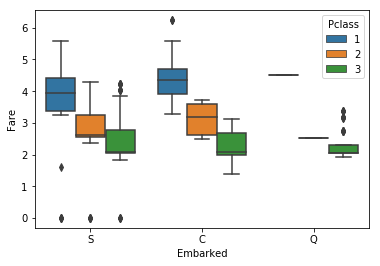

In [379]:
sns.boxplot(x="Embarked",y="Fare", hue="Pclass", data=data)

Majority of passengers paid 80 for 1. class in Embarkement C, so we can fill missing values with C.

In [380]:
data["Embarked"] = data["Embarked"].fillna('C')

There is 177 missing values for Age so it is possible to reasinobly make estimates about missing values. There are potentialy many possible ways of how to do it. Interesting one is to use some learning algorithm such Random Forest to predict missing values.

In [381]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked', 'Deck']
data['Embarked']=labelEnc.fit_transform(data['Embarked'].astype(str))
data['Deck']=labelEnc.fit_transform(data['Deck'].astype(str))
data['FamilySize']=labelEnc.fit_transform(data['FamilySize'])    
data.head()

,Sex,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Med,Large,Deck
0,0,0,3,22.0,1,0,A/5 21171,1.981001,NaN,2,1,0,1,0,0,8
1,1,1,1,38.0,1,0,PC 17599,4.266662,C85,0,1,0,1,0,0,2
2,1,1,3,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,0,1,0,0,0,8
3,1,1,1,35.0,1,0,113803,3.972177,C123,2,1,0,1,0,0,2
4,0,0,3,35.0,0,0,373450,2.085672,NaN,2,0,1,0,0,0,8


In [382]:
from sklearn.ensemble import RandomForestRegressor

In [383]:
def fill_missing_age(df):
    dat = df[['Age','Survived', 'Pclass', 'SibSp', 'Parch',
                 'Fare', 'Embarked', 'Deck']]
    train  = dat.loc[(df['Age'].notnull())]
    test = dat.loc[(df['Age'].isnull()) ]
    y = train.values[:, 0]
    X = train.values[:, 1::]
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    predictedAges = rtr.predict(test.values[:, 1::])
    df.loc[(df['Age'].isnull()),'Age'] = predictedAges
    return df

In [384]:
data = fill_missing_age(data)

In [385]:
data.head()

,Sex,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Med,Large,Deck
0,0,0,3,22.0,1,0,A/5 21171,1.981001,NaN,2,1,0,1,0,0,8
1,1,1,1,38.0,1,0,PC 17599,4.266662,C85,0,1,0,1,0,0,2
2,1,1,3,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,0,1,0,0,0,8
3,1,1,1,35.0,1,0,113803,3.972177,C123,2,1,0,1,0,0,2
4,0,0,3,35.0,0,0,373450,2.085672,NaN,2,0,1,0,0,0,8


Feature transofrmation and cleaning

In [386]:
data = data.drop(['Ticket', 'Cabin'], axis = 1)

In [387]:
data["Pclass"] = data["Pclass"].astype("category")
data = pd.get_dummies(data, columns = ["Pclass"],prefix="Class")

In [388]:
data = pd.get_dummies(data, columns = ["Deck"],prefix="Deck")

In [389]:
data = pd.get_dummies(data, columns = ["Embarked"], prefix="Embarked")

In [390]:
data.head()

,Sex,Survived,Age,SibSp,Parch,Fare,FamilySize,Single,Small,Med,...,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Embarked_0,Embarked_1,Embarked_2
0,0,0,22.0,1,0,1.981001,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,4.266662,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,1,26.0,0,0,2.070022,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,3.972177,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,35.0,0,0,2.085672,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [392]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.2, random_state=69, shuffle = True)

In [393]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [394]:
LogReg = LogisticRegression()

LogReg.fit(X_train, y_train)

pred = LogReg.predict(X_test)

accuracy_score(y_test, pred)

0.83240223463687146

Modeling

I believe that there is no silver bullet algorithm,yet. So it necessary to try different kind of classifiers in order to get the best results.

In [400]:
kfold = StratifiedKFold(n_splits=5)

/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


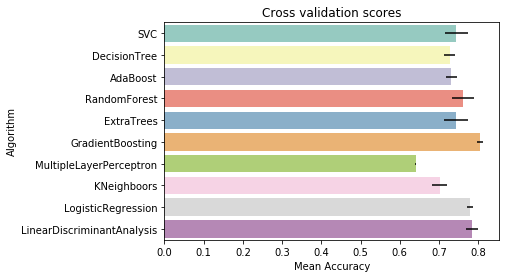

In [401]:
# Modeling step Test differents algorithms 
random_state = 2018
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

Worth trying to hyperparameter tunnig seems to be GradientBoosting, RandomForest, LogisticRegression and LDA.

In [440]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   10.0s finished


0.8033707865168539

In [441]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.1s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:   39.2s finished


0.824438202247191

In [442]:
# RFC Parameters tunning 
LR = LogisticRegression()


## Search grid for optimal parameters
rf_param_grid = {"penalty" : ['l1', 'l2'],
                 "C":[0.001,0.01,0.1,1,10,100],
              }


gsLR = GridSearchCV(LR,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLR.fit(X_train,y_train)

LR_best = gsLR.best_estimator_

# Best score
gsLR.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.6s finished


0.7808988764044944

In [443]:
# RFC Parameters tunning 
LDA = LinearDiscriminantAnalysis()


## Search grid for optimal parameters
rf_param_grid = {"solver" : ['lsqr', 'eigen'],
                 "shrinkage":['auto'],
              }


gsLDA = GridSearchCV(LDA,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)

LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


0.776685393258427

Learning Cuves

In [444]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

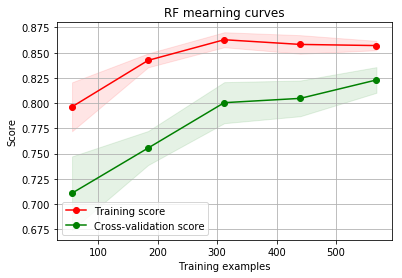

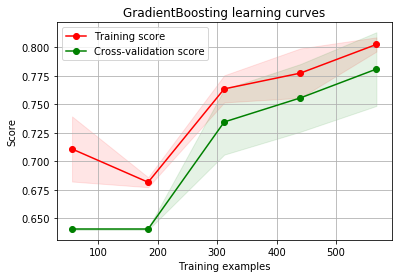

In [445]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)

IndexError: list index out of range

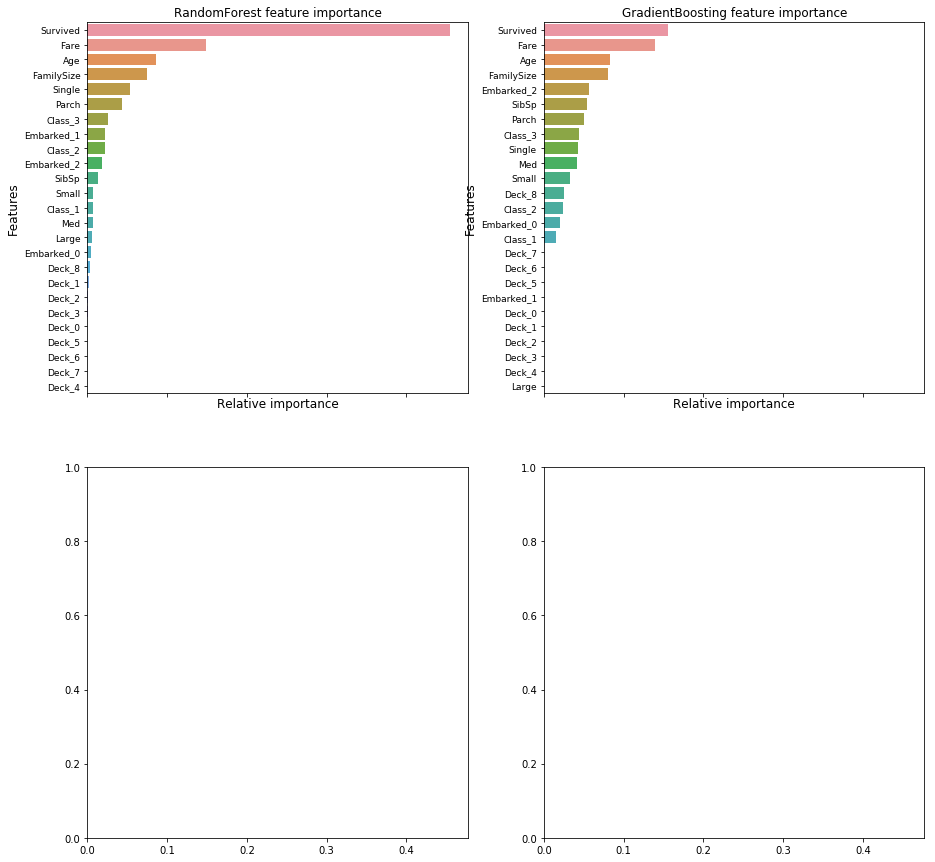

In [446]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [447]:
test_Survived_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_Survived_LR = pd.Series(LR_best.predict(X_test), name="ExtC")
test_Survived_LDA = pd.Series(LDA_best.predict(X_test), name="SVC")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")

In [448]:
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_LR,test_Survived_LDA,test_Survived_GBC],axis=1)


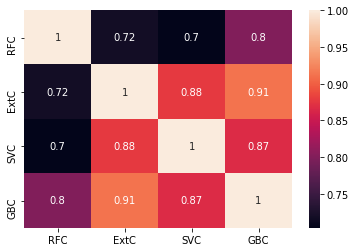

In [449]:
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [451]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('lr', LR_best),
('lda',LDA_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [452]:
test_Survived = pd.Series(votingC.predict(X_test), name="Survived")

In [453]:
accuracy_score(y_test, test_Survived)

0.84916201117318435